# **Aproximação de soluções para a equação Benjamin-Bona-Mahony via Redes Neurais Fisicamente Guiadas (PINNs)**

## **Introdução**


- Nova abordagem numérica para resolver EDPs utilizando Redes Neurais
- **Referências**  
    - **Benjamin et al:** BENJAMIN, T. B.; BONA, J. L.; MAHONY, J. J. Model equations for long waves in nonlinear dispersive systems. *Philosophical Transactions of the Royal Society of London. Series A, Mathematical and Physical Sciences*, v. 272, n. 1220, p. 47–78, 1972. ([Link](https://royalsocietypublishing.org/doi/10.1098/rsta.1972.0035))  

    - **Crighton:** CRIGHTON, D. G. Applications of kdv. In: *KdV’95: Proceedings of the International Symposium held in Amsterdam, The Netherlands, April 23–26, 1995, to commemorate the centennial of the publication of the equation by and named after Korteweg and de Vries*. Springer, 1995. p. 39–67.  

    - **Raissi et al:** RAISSI, M.; PERDIKARIS, P.; KARNIADAKIS, G. E. Physics informed deep learning (part I): Data-driven solutions of nonlinear partial differential equations. *arXiv preprint arXiv:1711.10561*, 2017. ([Link](https://arxiv.org/abs/1711.10561))  

    - **Lu et al:** LU, L.; MENG, X.; MAO, Z.; KARNIADAKIS, G. E. DeepXDE: A Deep Learning Library for Solving Differential Equations. *SIAM Review*, v. 63, n. 1, p. 208–228, 2021. ([Link - arXiv](https://arxiv.org/abs/1907.04502); [Link - SIAM](https://epubs.siam.org/doi/10.1137/19M1274067))  

    - **Taylor et al:** TAYLOR, J.; WANG, W.; BALA, B.; BEDNARZ, T. Optimizing the optimizer for data driven deep neural networks and physics informed neural networks. *arXiv preprint arXiv:2205.07430*, 2022. ([Link](https://arxiv.org/abs/2205.07430))  


- Redes Neurais tem suas vantagens e desvantagens

  **Vantagens**
    - [Teoria da Aproximação Universal](https://drive.google.com/file/d/1xfE2Bx9NbVeNU_mseTpIaYO0wIQZbbXb/view?usp=drive_link)
    - Incorporação da física da EDP
    - Fácil implementação e eficiencia computacional

  **Desvantagens**
    - Alto Custo Computacional
    - Como a rede achou a solução?
    - Dependência de Dados de Treinamento

### 1. Descrição da Equação de Benjamin-Bona-Mahony (BBM)

#### A Equação Diferencial Parcial que trataremos consiste em determinar $u = u(x,t)$ solução de:

$$
\begin{aligned}
    u_t + u_x + u \, u_x - \, u_{xxt} &= 0, \quad &&\quad (x,t) \in  (-10, 20) \times (0,4) \\
   u(x,0) &= u_0(x),                 \quad &&\quad x \in (-10, 20),\\
   u(-10,t) &= g_1(t) \\
   u(20,t) &= g_2(t)                      \quad &&\quad t \in (0,4),
\end{aligned}
$$

### 2. Modelagem Computacional

O tratamento numérico da Equação de BBM será feito por meio de uma formulação computacional que consiste em transformar o problema de valor inicial e de fronteira em um problema de otimização.

Mais especificamente, vamos determinar uma função $u(x,t)$ que resolve simultaneamente os seguintes problemas de otimização:

1. Problema:
$$
\min |\mathcal{D}(x,t)| \quad \text{s.a.} \quad (x,t) \in (-10, 20) \times (0,4),
$$
onde
$$
\mathcal{D} := u_t + u_x + u \, u_x - u_{xxt}.
$$

2. Problema:
$$
\min |u(x,0) - u_0(x)| \quad \text{s.a.} \quad x \in (-10, 20).
$$

3. Problema:
$$
\min \left( |u(-10,t) - g_1(t)| + |u(20,t) - g_2(t)| \right) \quad \text{s.a.} \quad t \in (0,4).
$$

A função $u(x,t)$ será aproximada via Redes Neurais por meio da minimização do **Erro Médio Quadrático (EMQ)** da função de perda.

Neste contexto, os problemas acima são reescritos da seguinte forma:

1. Resíduo da equação diferencial:
$$
\text{EMQ}_\mathcal{D} = \cfrac{1}{N_\mathcal{D}} \sum_{i=1}^{N_\mathcal{D}} \left[ \mathcal{D}(x_i, t_i) \right]^2,
$$
onde $(x_i, t_i)$, $i = 1, \cdots, N_\mathcal{D}$, representa $N_\mathcal{D}$ pontos de colocação escolhidos aleatoriamente no domínio $(-10, 20) \times (0,4)$.

2. Resíduo da condição inicial:
$$
\text{EMQ}_0 = \cfrac{1}{N_0} \sum_{i=1}^{N_0} \left( u(x_i,0) - u_0(x_i) \right)^2,
$$
onde $x_i$, $i = 1, \cdots, N_0$ representa $N_0$ pontos de colocação no intervalo $(-10, 20)$.

3. Resíduo das condições de contorno:
$$
\text{EMQ}_b = \cfrac{1}{N_b} \sum_{i=1}^{N_b} \left( |u(-10, t_i) - g_1(t_i)| + |u(20, t_i) - g_2(t_i)| \right)^2,
$$
onde $t_i$, $i = 1, \cdots, N_b$, são $N_b$ pontos de colocação ao longo do conjunto $\{-10, 20\} \times (0,4)$.

Por fim, minimizamos a função de perda:
$$
\text{EMQ} = \text{EMQ}_\mathcal{D} + \text{EMQ}_0 + \text{EMQ}_b.
$$

Iremos utilizar a biblioteca em Python [**DeepXDE**](https://deepxde.readthedocs.io/en/latest/index.html) para implementar e treinar a rede neural.


## 3. Implementação numérica

### Variáveis globais/parâmetros do código

In [3]:
# Parâmetros da Solução Inicial
A = 5 # Amplitude

# Intervalo dos domínios
space_domain = (-10, 20) # (-10, 40)
T = 4 # (0, 4)

# Semente aleatória
seed_value = 0

# Pontos de colocação
N_f = 15000 # No domínio
N_b = 100 # Na fronteira
N_0 = 100 # No valor inicial

# Arquitetura da rede
neurônios = 50
camadas = 6


# Número de iterações do otimizador
iterations = 15000

# Otimizadores que iremos testar neste código
optimizers = ["L-BFGS", "sgd", "adam", "nadam"]

### Importando principais bibliotecas e outras dependências

In [4]:
!pip install deepxde -q  # -q para ele instalar sem as mensagens de instalação
import os

os.environ['DDE_BACKEND'] = 'tensorflow'  # Existem outras opções como tensorflow.compat.v1, pytorch, jax, paddle.

import deepxde as dde
import numpy as np
from deepxde.backend import tf

# Semente aleatória fixa, para garantir reprodução dos resultados
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
dde.config.set_random_seed(seed_value)

# Bibliotecas de animação para GIFs
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.7/190.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.8 MB/s eta 0:00:00


Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



### Definindo o Problema

A equação BMM é uma _equação diferencial parcial não linear_ e possui uma solução de onda viajante da forma

$$
\begin{alignat*}{2}
    u(x,t) = A \, \text{sech}^2(k(x - ct)),
\end{alignat*}
$$

onde:  
- $A > 0$ é um parâmetro dado e chamado de **amplitude**;  
- $k = \sqrt{\frac{A}{12+4A}}$, chamado de **frequência**;  
- $c = 1 + \frac{A}{3}$, chamado de **velocidade**.  

Com o objetivo de fornecer o melhor cenário para as PINNs, utilizamos essa solução avaliada no tempo inicial e nas condições de contorno.

O problema é então escrito como:

$$
\begin{alignat*}{2}
    u_t + u_x + u u_x - u_{xxt} &= 0, &\qquad& (x,t) \in  (-10, 20) \times (0,4),\\
    u(x,0) &= A \, \text{sech}^2(kx), &\qquad& x \in (-10, 20),\\
    u(-10,t) &= A \, \text{sech}^2(k(-10 - ct)), \\
    u(20,t) &= A \, \text{sech}^2(k(20 - ct)), &\qquad& t \in (0,4),
\end{alignat*}
$$

onde:  
- $A > 0$;  
- $k = \sqrt{\frac{A}{12+4A}}$;  
- $c = 1 + \frac{A}{3}$.  


In [5]:
# Solução exata da BBM
def BBM(x, t, A=A):
    k = np.sqrt(A / (12 + 4*A))
    c = (3 + A) / 3

    return A / np.power(np.cosh(k*(x - c*t)), 2)

### Resíduo da EDP

In [6]:
def pde(x, y):
    # x = (x, t) representa as coordenadas espaciais (x) e temporais (t)
    # y = u(x, t) representa a aproximação da rede no ponto (x, t)

    u = y
    u_t = dde.grad.jacobian(y, x, i=0, j=1)
    u_x = dde.grad.jacobian(y, x, i=0, j=0)
    u_xx = dde.grad.hessian(y, x, i=0, j=0)
    u_xxt = dde.grad.jacobian(u_xx, x, i=0, j=1)

    return u_t + u_x + u * u_x - u_xxt

### Domínio

Definimos uma geometria computacional e um domínio de tempo. Podemos usar uma classe interna Interval e TimeDomain e combinar ambos os domínios usando GeometryXTime da seguinte forma:

In [7]:
# TODO: network that also predicts parameters A and x_0

geom = dde.geometry.Interval(*space_domain) # o operador * espalha os elementos da tupla para os argumentos da função
timeDomain = dde.geometry.TimeDomain(0, T)

geomtime = dde.geometry.GeometryXTime(geom, timeDomain)

### Condições iniciais e de contorno

In [8]:
def initial(_, on_initial):
    return on_initial

def boundary_left(x, on_boundary):
  return on_boundary and dde.utils.isclose(x[0], space_domain[1])

def boundary_right(x, on_boundary):
  return on_boundary and dde.utils.isclose(x[0], space_domain[0])

def u_0(x):
  return BBM(x[:, 0:1], 0)

bc_left = dde.icbc.DirichletBC(geomtime, lambda x: BBM(x[:, 0:1], 0), boundary_left)
bc_right = dde.icbc.DirichletBC(geomtime, lambda x: BBM(x[:, 0:1], T), boundary_right)

ic = dde.icbc.IC(geomtime, u_0, initial)

### Treinamento

In [9]:
data = dde.data.TimePDE(
    geomtime, pde, [bc_left, bc_right, ic],
    num_domain=N_f,
    num_boundary=N_b,
    num_initial=N_0
)

#### Visualização dos pontos de colocação no domínio da EDP

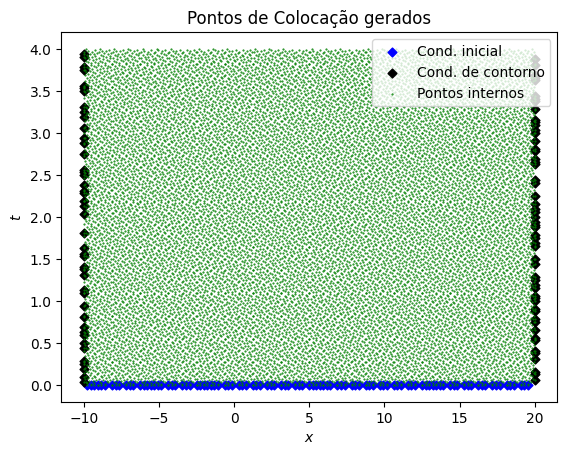

In [10]:
indices_zero = np.where(data.train_x_bc[:, 1] == 0)[0]
valores_zero = data.train_x_bc[indices_zero, :]

indices_borda = np.where((data.train_x_bc[:, 0] == -10) | (data.train_x_bc[:, 0] == 20))[0]
valores_borda = data.train_x_bc[indices_borda, :]

plt.scatter(valores_zero[:, 0], valores_zero[:, 1], color='blue', marker="D", s=20, label='Cond. inicial')

plt.scatter(valores_borda[:, 0], valores_borda[:, 1], color='black', marker="D", s=20, label='Cond. de contorno')

plt.scatter(data.train_x_all[:, 0], data.train_x_all[:, 1], color='green', alpha=1, s=1, marker='.', label='Pontos internos')

plt.title("Pontos de Colocação gerados")
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.legend(loc='upper right')

#### Montando e treinando a rede neural

In [11]:
# [2] inputs: x, t
# [1] output: u(x,t)

net = dde.nn.FNN([2] + [neurônios] * camadas + [1], "tanh", tf.keras.initializers.GlorotNormal(seed=seed_value))

Compiling model...
'compile' took 0.002430 s

Training model...



Cause: could not parse the source code of <function <lambda> at 0x7d49a5482cb0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary1(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary2(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7d49a5482cb0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary1(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary2(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7d49a5483010>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary1(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary2(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7d49a5483010>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary1(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary2(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Step      Train loss                                  Test loss                                   Test metric
0         [4.33e-02, 1.84e-01, 1.19e+00, 3.24e+00]    [4.33e-02, 1.84e-01, 1.19e+00, 3.24e+00]    []  
585       [1.17e-06, 7.43e-07, 7.18e-07, 4.10e-07]    [1.17e-06, 7.43e-07, 7.18e-07, 4.10e-07]    []  

Best model at step 585:
  train loss: 3.04e-06
  test loss: 3.04e-06
  test metric: []

'train' took 238.654248 s

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.

<ipython-input-12-cf3f254632db>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lossdata = pd.read_csv("loss.dat", delim_whitespace=True, comment='#', header=None)


Compiling model...
'compile' took 0.006410 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [4.33e-02, 1.84e-01, 1.19e+00, 3.24e+00]    [4.33e-02, 1.84e-01, 1.19e+00, 3.24e+00]    []  
1000      [1.33e-01, 2.01e-03, 1.35e-04, 1.16e-01]    [1.33e-01, 2.01e-03, 1.35e-04, 1.16e-01]    []  
2000      [5.78e-02, 3.39e-05, 2.79e-04, 2.63e-02]    [5.78e-02, 3.39e-05, 2.79e-04, 2.63e-02]    []  
3000      [3.34e-02, 3.90e-05, 2.36e-04, 9.55e-03]    [3.34e-02, 3.90e-05, 2.36e-04, 9.55e-03]    []  
4000      [2.20e-02, 1.04e-04, 1.72e-04, 5.59e-03]    [2.20e-02, 1.04e-04, 1.72e-04, 5.59e-03]    []  
5000      [1.58e-02, 1.33e-04, 1.33e-04, 3.60e-03]    [1.58e-02, 1.33e-04, 1.33e-04, 3.60e-03]    []  
6000      [1.22e-02, 1.09e-04, 1.08e-04, 2.42e-03]    [1.22e-02, 1.09e-04, 1.08e-04, 2.42e-03]    []  
7000      [1.01e-02, 7.36e-05, 8.96e-05, 1.72e-03]    [1.01e-02, 7.36e-05, 8.96e-05, 1.72e-03]    []  
8

<ipython-input-12-cf3f254632db>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lossdata = pd.read_csv("loss.dat", delim_whitespace=True, comment='#', header=None)


Compiling model...
'compile' took 0.005674 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [4.33e-02, 1.84e-01, 1.19e+00, 3.24e+00]    [4.33e-02, 1.84e-01, 1.19e+00, 3.24e+00]    []  
1000      [2.09e-04, 4.23e-06, 8.39e-06, 1.46e-05]    [2.09e-04, 4.23e-06, 8.39e-06, 1.46e-05]    []  
2000      [5.25e-05, 2.50e-06, 1.38e-06, 3.22e-06]    [5.25e-05, 2.50e-06, 1.38e-06, 3.22e-06]    []  
3000      [2.36e-05, 2.43e-06, 1.26e-06, 2.52e-06]    [2.36e-05, 2.43e-06, 1.26e-06, 2.52e-06]    []  
4000      [1.05e-04, 3.02e-06, 1.05e-06, 1.52e-05]    [1.05e-04, 3.02e-06, 1.05e-06, 1.52e-05]    []  
5000      [8.50e-06, 1.36e-06, 7.90e-07, 9.94e-07]    [8.50e-06, 1.36e-06, 7.90e-07, 9.94e-07]    []  
6000      [4.88e-04, 1.60e-06, 1.80e-06, 6.95e-05]    [4.88e-04, 1.60e-06, 1.80e-06, 6.95e-05]    []  
7000      [7.48e-06, 1.09e-06, 8.65e-07, 7.67e-07]    [7.48e-06, 1.09e-06, 8.65e-07, 7.67e-07]    []  
8

<ipython-input-12-cf3f254632db>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lossdata = pd.read_csv("loss.dat", delim_whitespace=True, comment='#', header=None)


Compiling model...
'compile' took 0.006090 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [4.33e-02, 1.84e-01, 1.19e+00, 3.24e+00]    [4.33e-02, 1.84e-01, 1.19e+00, 3.24e+00]    []  
1000      [8.63e-04, 6.81e-04, 5.89e-04, 8.24e-04]    [8.63e-04, 6.81e-04, 5.89e-04, 8.24e-04]    []  
2000      [1.11e-03, 2.58e-05, 6.26e-05, 1.18e-04]    [1.11e-03, 2.58e-05, 6.26e-05, 1.18e-04]    []  
3000      [8.64e-04, 2.25e-06, 9.11e-06, 1.65e-04]    [8.64e-04, 2.25e-06, 9.11e-06, 1.65e-04]    []  
4000      [7.38e-04, 3.01e-06, 3.11e-06, 1.82e-04]    [7.38e-04, 3.01e-06, 3.11e-06, 1.82e-04]    []  
5000      [6.69e-04, 2.05e-06, 4.89e-06, 2.07e-04]    [6.69e-04, 2.05e-06, 4.89e-06, 2.07e-04]    []  
6000      [5.92e-04, 1.99e-06, 3.96e-06, 2.32e-04]    [5.92e-04, 1.99e-06, 3.96e-06, 2.32e-04]    []  
7000      [5.69e-04, 2.77e-04, 3.44e-04, 9.37e-04]    [5.69e-04, 2.77e-04, 3.44e-04, 9.37e-04]    []  
8

<ipython-input-12-cf3f254632db>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lossdata = pd.read_csv("loss.dat", delim_whitespace=True, comment='#', header=None)


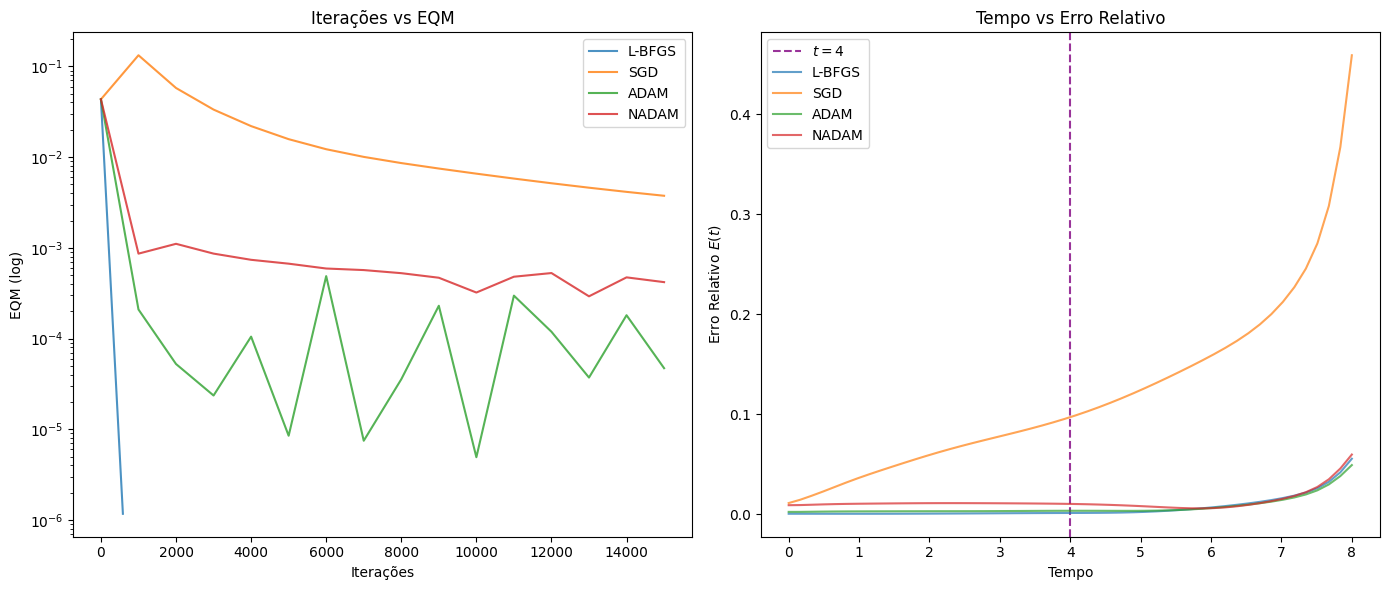

In [12]:
# Este é um plot que visualiza a corrida de
# otimizadores, dando atenção ao valor da função loss
# a cada mil iterações e vendo o erro relativo global com a solução exata
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_yscale("log")
ax1.set_xlabel("Iterações")
ax1.set_ylabel("EQM (log)")
ax1.set_title("Iterações vs EQM")
ax1.grid(False, which="both")

ax2.axvline(x = 4,
            color = 'purple',
            label = '$t = 4$',
            linestyle = "dashed",
            alpha=0.8)

ax2.set_xlabel("Tempo")
ax2.set_ylabel("Erro Relativo $E(t)$")
ax2.set_title("Tempo vs Erro Relativo")
ax1.grid(False, which="both")

for opt in optimizers:
  # Definindo a rede
  net = dde.nn.FNN([2] + [neurônios] * camadas + [1], "tanh", "zeros")

  # este loop serve para reproducibilidade dos resultados (sempre usar a mesma seed)
  for d in net.denses:
      d.kernel_initializer = tf.keras.initializers.GlorotNormal(seed=seed_value)

  # o model é onde guardamos a rede treinada
  model = dde.Model(data, net)
  model.compile(opt, lr=1e-3) # lr = learning rate dos otimizadores

  # aqui é onde o treinamento efetivamente acontece
  losshistory, train_state = model.train(iterations=iterations)
  dde.saveplot(losshistory, train_state, issave=True, isplot=False) # salvando valores do treinamento em um arquivo .dat

  # lendo valores do treinamento para plotar dps
  lossdata = pd.read_csv("loss.dat", delim_whitespace=True, comment='#', header=None)
  lossdata.columns = [f'col{i+1}' for i in range(lossdata.shape[1])]

  # pegando valores importantes
  step = lossdata["col1"].values
  loss = lossdata["col2"].values

  ax1.plot(step, loss, alpha=0.8, label=f"{opt}".upper())
  ax1.legend()

  x = np.linspace(*space_domain, 100)
  t = np.linspace(0, 2*T)

  def predict_data(t):
    t_array = np.full_like(x, t)
    c_array = np.full_like(x, t)

    X = np.vstack((x, t_array)).T
    return model.predict(X)

  # calculando erro global
  def erro(t):
      y_pred = predict_data(t)
      y_sol = BBM(x, t)
      return LA.norm(y_pred.T-y_sol) / LA.norm(y_sol)

  err_vals = [erro(t) for t in t]

  ax2.plot(t, err_vals, markersize=4, alpha=0.7, label=f"{opt}".upper())
  ax2.legend()

plt.tight_layout()
plt.show()

## Resultados

#### Calculando o erro global relativo

In [13]:
from numpy import linalg as LA

x = np.linspace(*space_domain, 150)
t = np.linspace(0, T)

def predict_data(t):
  t_array = np.full_like(x, t)
  c_array = np.full_like(x, t)

  X = np.vstack((x, t_array)).T
  return model.predict(X)

def erro(t):
    y_pred = predict_data(t)
    y_sol = BBM(x, t)
    return LA.norm(y_pred.T-y_sol) / LA.norm(y_sol)

erro_t = [erro(k) for k in t]

print(f'Erro relativo: {LA.norm(erro_t):10.8e}')

Erro relativo: 7.43363117e-02


#### Criação de GIF

In [14]:
Figure = plt.figure(figsize=(6, 4.5))

plt.title('Aproximação da PINN vs Solução exata')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.grid(True)

predicted_line = plt.plot([], 'b-', label="PINN")[0]
solution_line = plt.plot([], 'r-.', label="Solução exata")[0]

plt.legend(loc="upper left")
plt.xlim(*space_domain)
plt.ylim(-0.1, A)

time_text = plt.figtext(0.15, 0.65, '', fontsize=10, backgroundcolor="lightgrey")

def AnimationFunction(frame):
    K=0.01
    y_pred = predict_data(K*frame)
    y_sol = BBM(x, K*frame)
    predicted_line.set_data((x, y_pred))
    solution_line.set_data((x, y_sol))
    time_text.set_text(f't = {np.round(K*frame, decimals=2)}')

anim_created = FuncAnimation(Figure, AnimationFunction, frames=(200 * T), interval=600)
writer = animation.PillowWriter(
    fps=24,
    metadata=dict(artist='Samuel Kutz'),
    bitrate=1800
)

anim_created.save(f'{neurônios}-{camadas}_{iterations}.gif', writer=writer)
plt.close()

#### Tabela para escolha de arquitetura da rede

In [15]:
Neurons = [25, 50, 75]
Layers = [4, 8, 12]

erros = np.zeros(shape=(len(Layers), len(Neurons)))

for Neuron in Neurons:
    for Layer in Layers:
        net = dde.nn.FNN([2] + [Neuron] * Layer + [1], "tanh", tf.keras.initializers.GlorotNormal(seed=0))

        model = dde.Model(data, net)
        model.compile("adam", lr=1e-3)

        print("Treinamento para " + str(Neuron) + " Neurônios e " + str(Layer) + " Camadas\n")

        losshistory, train_state = model.train(iterations=iterations)

        erro_t = [erro(k) for k in t]

        print(f'Erro relativo: {LA.norm(erro_t):10.8e}\n')

        erros[Layers.index(Layer), Neurons.index(Neuron)] = f'{LA.norm(erro_t):10.8e}'

Compiling model...
'compile' took 0.003504 s

Treinamento para 25 Neurônios e 4 Camadas

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [1.26e-02, 2.76e-04, 4.29e-02, 2.84e+00]    [1.26e-02, 2.76e-04, 4.29e-02, 2.84e+00]    []  
1000      [2.99e-04, 4.87e-06, 1.55e-05, 7.04e-05]    [2.99e-04, 4.87e-06, 1.55e-05, 7.04e-05]    []  
2000      [7.03e-05, 1.36e-06, 3.57e-06, 1.03e-05]    [7.03e-05, 1.36e-06, 3.57e-06, 1.03e-05]    []  
3000      [8.94e-05, 1.19e-04, 1.20e-04, 1.26e-04]    [8.94e-05, 1.19e-04, 1.20e-04, 1.26e-04]    []  
4000      [1.93e-05, 1.73e-06, 1.66e-06, 1.70e-06]    [1.93e-05, 1.73e-06, 1.66e-06, 1.70e-06]    []  
5000      [1.32e-05, 1.73e-06, 1.46e-06, 1.32e-06]    [1.32e-05, 1.73e-06, 1.46e-06, 1.32e-06]    []  
6000      [1.04e-05, 1.69e-06, 1.31e-06, 1.19e-06]    [1.04e-05, 1.69e-06, 1.31e-06, 1.19e-06]    []  
7000      [7.83e-06, 1.85e-06, 1.25e-06, 1.19e-06]    [7.83e-